In [1]:
# predicting the iris species using logistic regression
# by nandita sajeev

# importing the dataset

import pandas as pd

dataset = pd.read_csv("iris.csv")
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
# dividing the dataset into features(independent variables) and labels(dependent variable)
X = dataset.iloc[:,1 : -1].values
Y = dataset.iloc[:, -1]. values
print(X[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [3]:
print(Y[:10])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


In [4]:
# splitting the data into training and test data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [6]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
print(X_train[:10])

[[ 0.61303014  0.10850105  0.94751783  0.73603967]
 [-0.56776627 -0.12400121  0.38491447  0.34808318]
 [-0.80392556  1.03851009 -1.30289562 -1.3330616 ]
 [ 0.25879121 -0.12400121  0.60995581  0.73603967]
 [ 0.61303014 -0.58900572  1.00377816  1.25331499]
 [-0.80392556 -0.82150798  0.04735245  0.21876435]
 [-0.21352735  1.73601687 -1.19037495 -1.20374277]
 [ 0.14071157 -0.82150798  0.72247648  0.47740201]
 [ 0.02263193 -0.12400121  0.21613346  0.34808318]
 [-0.09544771 -1.05401024  0.10361279 -0.03987331]]


In [10]:
# creating and training the logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(multi_class = 'ovr', random_state = 0)
classifier.fit(X_train, Y_train)


In [34]:
# predicting results
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score

predictions = classifier.predict(X_test)
cm = confusion_matrix(predictions, Y_test)
print("The confusion matrix")
print(cm)
print("Accuracy:",accuracy_score(Y_test, predictions))



The confusion matrix
[[11  0  0]
 [ 0 11  1]
 [ 0  2  5]]
Accuracy: 0.9


Text(0.5, 257.44, 'Predicted label')

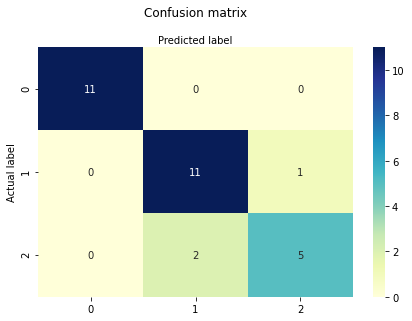

In [29]:
# visualising the confusion matrix using heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
class_names = [0,1]
fig, ax = plt.subplots()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')

ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
